<a href="https://colab.research.google.com/github/Parth-107/Practice_Machine_Learning/blob/main/Neural_network_Classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification  with tensorflow

A classification is where you try to classify something as one thing or another.

A few types of classificatio:

* Binary classification 
* Multiclass classification
* Multilable classification

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
samples = 1000

#create circles
X, y = make_circles(samples,
                       noise = 0.03,
                       random_state= 42)

In [ ]:
#Let's checkout the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#cehck the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now..Let's visualize

Useful Link= "https://playground.tensorflow.org/"


In [ ]:
import pandas as pd
import tensorflow as tf

circles= pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


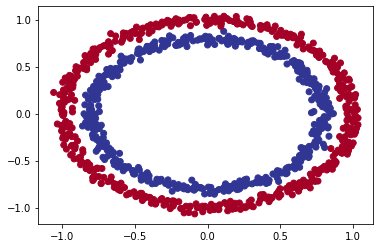

In [ ]:
#Visualize with a Plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#Create the classification model

1)Create the model

2)compile the model

3)fit the model

4) Evaluate the model

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                  tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


#Our model is around just 50% accurate, so let's improve our model 

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                tf.keras.layers.Dense(100, activation="relu"),
                tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X,y)


32/32 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9990


[0.14449326694011688, 0.9990000128746033]

##To visualize our model's prediction create the function ' plot_decision_boundry '

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of different X values
* Make prediction across the meshgrid
* Plot the predictions and as well as line between zones, where each unique class fall

** Best resource:- https://cs231n.github.io/neural-networks-case-study/ **

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundry(model, X, y):
  #define the axis boundries of the plot and create the meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] #np.c_ will make all the values in single axis and ravel() function returns a contiguous flattened array
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    #if so then we have change the shape for that
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundry
  plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap= plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing Binary classification


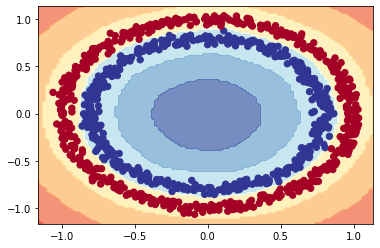

In [ ]:
#check the predictions that our model making
plot_decision_boundry(model_2, X, y)

In [ ]:
#Let's see our model can be use for Regression problem...

tf.random.set_seed(42)

x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

#Split our data into training and testing sets
x_reg_train = x_reg[:150]#for X
x_reg_test = x_reg[150:]
y_reg_train = y_reg[:150]#for Y
y_reg_test = y_reg[150:]

#Fit our model to regression data



In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_3.fit(x_reg_train, y_reg_train, epochs=100, verbose=0)

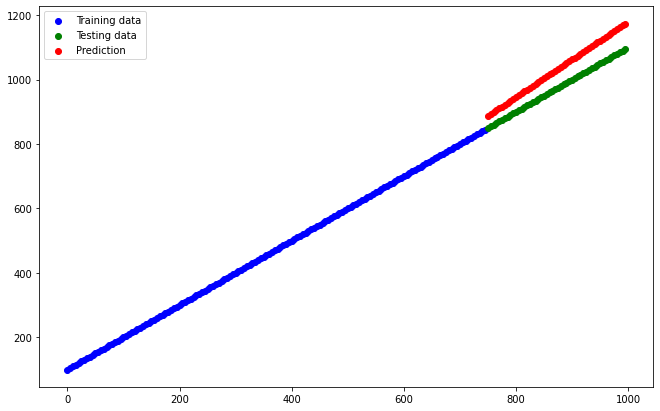

In [ ]:
y_reg_pre = model_3.predict(x_reg_test)

plt.figure(figsize=(11,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(x_reg_test, y_reg_pre, c="r", label="Prediction")
plt.legend()

#The missing piece: Non-linearity

In [ ]:
#set seed
tf.random.set_seed(42)

#1. create the model
model_4= tf.keras.Sequential([
              tf.keras.layers.Dense(1, activation="linear")
])

#2. compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics= ["accuracy"])

#3.fit the model
history= model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

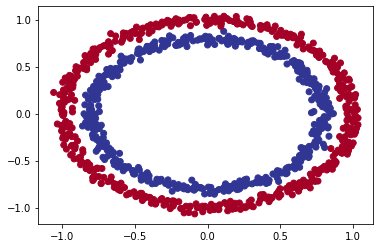

In [ ]:
#check out our model again

plt.scatter(X[:, 0], X[:, 1], c=y, cmap= plt.cm.RdYlBu)

doing Binary classification


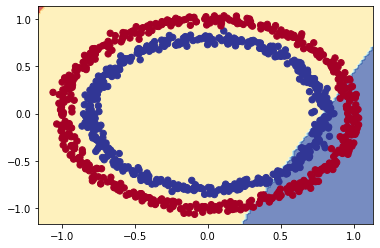

In [ ]:
#check the dicision boundry for out latest model
plot_decision_boundry(model_4, X, y)

#Let's try to build the nueral network with non-linear activation function.


In [ ]:
#set seed
tf.random.set_seed(41)

#1. create the model
model_5= tf.keras.Sequential([
              tf.keras.layers.Dense(1, activation="relu")
])

#2.compile the model
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics= ["accuracy"])

#3.fit the model
history = model_5.fit(X, y, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2748 - accuracy: 0.4550
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2074 - accuracy: 0.4450
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1864 - accuracy: 0.4440
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1514 - accuracy: 0.4370
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1024 - accuracy: 0.4250
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0819 - accuracy: 0.4160
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0436 - accuracy: 0.4130
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0006 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9329 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8574 - accuracy: 0.4140
Epoch 11/

#Again build the model with more hidden layers

In [ ]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
            tf.keras.layers.Dense(30, activation="relu"),
            tf.keras.layers.Dense(1, activation="relu")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_6.fit(X, y, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.9077 - accuracy: 0.4470
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8040 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7780 - accuracy: 0.3070
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7665 - accuracy: 0.2630
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.2500
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.2710
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7445 - accuracy: 0.1650
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7384 - accuracy: 0.2420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.2930
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7240 - accuracy: 0.3920
Epoch 11/

doing Binary classification


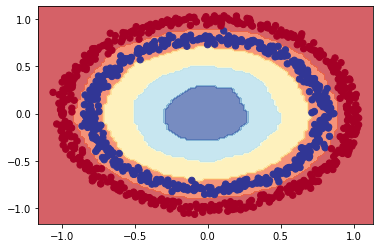

In [ ]:
#Let's create the dicision boundry
plot_decision_boundry(model_6, X, y)

#Let's use sigmoid in activation 

In [ ]:
tf.random.set_seed(42)

model_7= tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_7.fit(X, y, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
#Evaluate the model_7
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing Binary classification


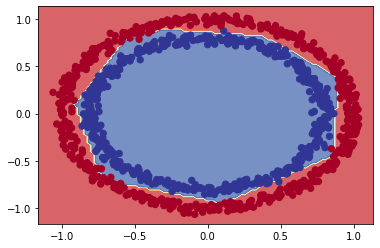

In [ ]:
plot_decision_boundry(model_7, X, y)

**Note:** The combination of **Linear (stright lines) and none-linear (no-straight lines)** is the key fundamentals in Neural Network. The nueral network is the combination of linear and non-linear activations model to find the patterns in the data. 

**Important Link for Image:** https://www.google.com/url?sa=i&url=https%3A%2F%2Fdocs.paperspace.com%2Fmachine-learning%2Fwiki%2Factivation-function&psig=AOvVaw0x0mGPnt2lbf_B5C3eARsE&ust=1621118746434000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPinopKgyvACFQAAAAAdAAAAABAD

**To find more about:** https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

In [ ]:
#Let's create the new Toy tensor, which is similar to our data we pass into our model.
A= tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

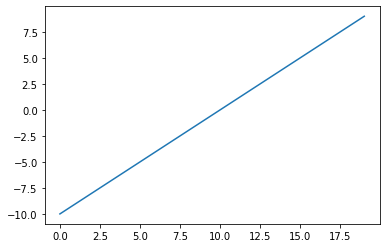

In [ ]:
#Visualize our toy Tesnsor
plt.plot(A)

In [ ]:
#Let's start by replicating Sigmoid function :- sigmoid(x)= 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

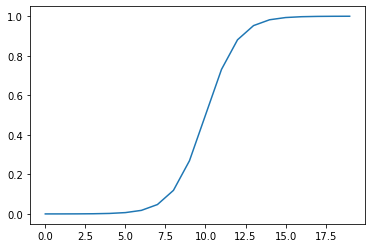

In [ ]:
#Plot our toy function transformed by sigmoid function
plt.plot(sigmoid(A))

In [ ]:
#replacating relu function:- max(0, x) (transform all values within 0 to x)
def relu(x):
  return tf.maximum(0, x)

#use the relu function on our toy tensor
print("Relu function :",relu(A)), print("Original tensor: ", A)


Relu function : tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)
Original tensor:  tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)


(None, None)

#It seems like Relu turns all negative numbers into zero 

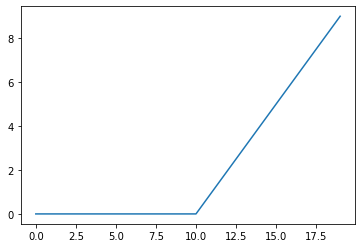

In [ ]:
#Plot our toy function transformed by relu function
plt.plot(relu(A))

In [ ]:
#Let's try the linear activation function
def linear(x):#It will not change anything it is as same as normal tensor that we have created
  return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

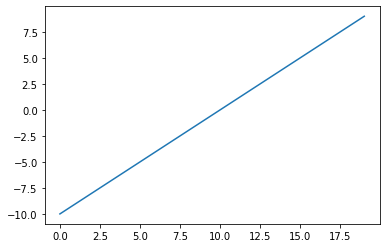

In [ ]:
#Does the linear activation function change anything?
plt.plot(linear(A))

#Evaluating and Improve our model.

So far we have been training and testing on the same datasets...

However, in Machine Learning this is a wrong practice, so now we will create the a training and testing sets.

In [ ]:
#Cehck total examples we have
len(X)

1000

In [ ]:
#Create training and testing sets. Mainly two ways for this 1.train_test_split and 2.Indexing
x_train, y_train = X[:800], y[:800]#80% training data
x_test, y_test = X[800:], y[800:]#20% testing data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Let's recreate a model to fit on training data and evaluate on testing data

tf.random.set_seed(42)

#1.create the model (same as model_7)
model_8 = tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

#2.compile the model
model_8.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),#increase the learning rate by 10 times
                metrics= ["accuracy"])

#3.fit the mdoel 
history = model_8.fit(x_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
#evaluate the model_8 on test datasets
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing Binary classification
doing Binary classification


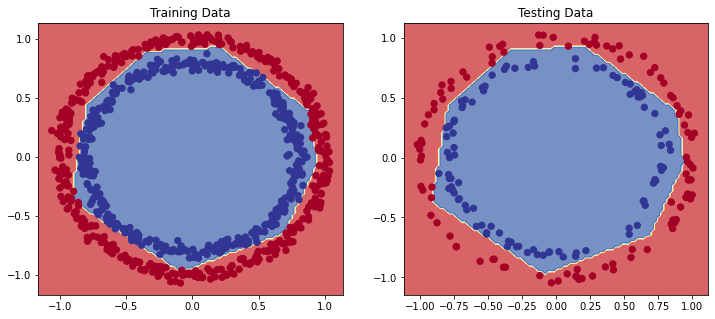

In [ ]:
#plot the decision bounndry on a traning and test set
plt.figure(figsize=(12, 5))#(Width, height)
plt.subplot(1,2,1)#(rows, cols, 1st plot)
plt.title("Training Data")
plot_decision_boundry(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundry(model_8,x_test,y_test)
plt.show()

#Plot the loss or training curves, that we stored in history function.

In [ ]:
#Convert the history variable in DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

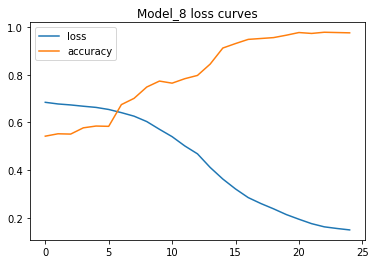

In [ ]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

##Finding the best Learning Rate 

To fing the ideal learning rate (means the loss decreases the most during the training). We are going to use following steps.

* A learning rate **callback**:- It is one kind of functionality that you can add in your training.
* We need another model (we could use the same model as above)
* A modified loss curves function 



In [ ]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_9 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation = "relu"),
              tf.keras.layers.Dense(4, activation = "relu"),
              tf.keras.layers.Dense(1, activation= "sigmoid")
])

#Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics= ["accuracy"])

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model
history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

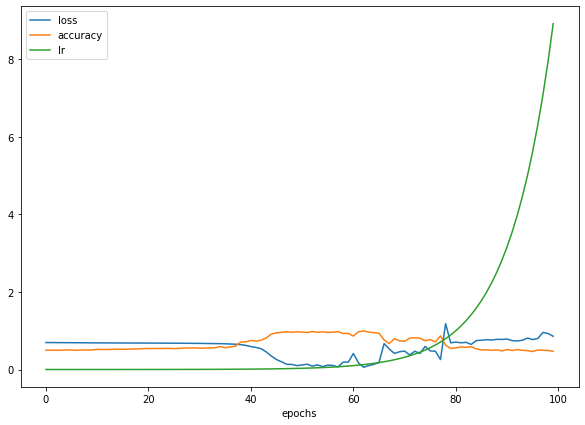

In [ ]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate VS Loss')

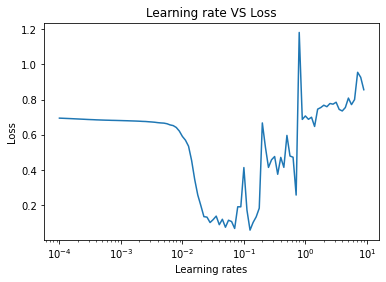

In [ ]:
#Plot the learning rate VS loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.plot(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rates")
plt.ylabel("Loss")
plt.title("Learning rate VS Loss")

In [ ]:
#Example of some other learning rate examples:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
#Let's try using a higher learning rate with same model before
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation= "relu"),
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(lr =0.02),
                 metrics = ["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

## More classification evaluation methods

Some of the following most common classifcation methods and metrics that you should know:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit learn)

In [ ]:
#Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set :{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set :0.05740184709429741
Model accuracy on the test set:99.00%


In [ ]:
#Let's check Confusion Matrix
from sklearn.metrics import confusion_matrix

#Make predictios
y_preds = model_10.predict(x_test)

#Create confusion matrix
#confusion_matrix(y_test, y_preds)

Currently it'll can't handle a mix of binary and continuous targets because our y_test is in the continuous form and y_preds is in the Binary form as you can see below...

In [ ]:
y_test[:10]#Binary form

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]#continous form

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
#Convert prediction probabilities into binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

##Now, we will write the confusion matrix code, and that is a remix of scikit-learn's plot_confusioin_matrix

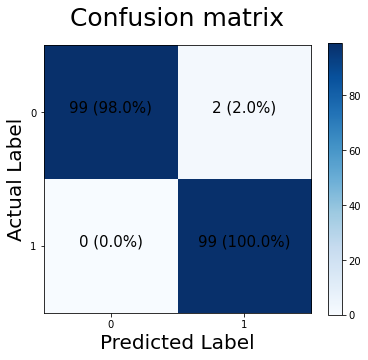

In [ ]:
import itertools

figsize = (10,10)

#Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #To normalize our confusion matrix
n_classes = cm.shape[0]

#Let's draw it
fig, ax = plt.subplots(figsize=(6,5))
#create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
fig.colorbar(cax)

#Create the classes if we are working with binary or multiclass classification
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axis
ax.set(title= "Confusion matrix",
       xlabel= "Predicted Label",
       ylabel= "Actual Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#set x-axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size and Title size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(25)

#Set the threshold for different colors
threshold = (cm.max() + cm.max())/2.

#Plot the text in each cell or box
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size= 15)

#Multiclass class classification with larger examples.

When you have more than 2 classes as an option, it's known as **multiclass classification**. 

Which means if you have 3 or 100 different classes is konwn as mutliclass classificatio.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test sets in tensorflow datasets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#check first traning data
print(f"Training samples:\n{train_data[0]}\n")
print(f"Train labels:\n{train_labels[0]}\n")

Training samples:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

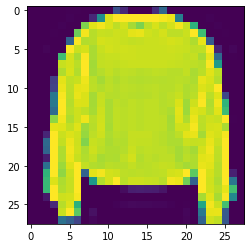

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
#Create a list so we can index onto training labels in human readable format
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

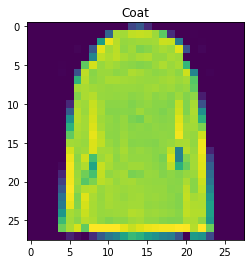

In [ ]:
#Plot an example img and it's label
index = 2000

plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

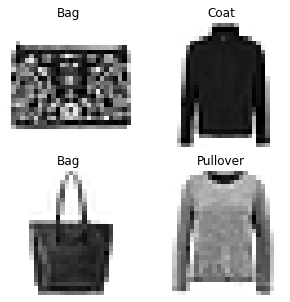

In [ ]:
#Plot multiple random imgs
import random

plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
len(class_names) #one per class of clothing

10

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28,28)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])

non_norm_history = model_11.fit(train_data, 
                                tf.one_hot((train_labels), depth=10), 
                                epochs= 10, 
                                validation_data=(test_data, tf.one_hot((test_labels), depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
#Check the model summery
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#NN prefer data to be Scaled (or Normalized), which menas they like to have numbers between 0 and 1.

In [ ]:
#But here we have numbers between 0 and 255
train_data.min(), train_data.max()

#We can get traininf and testing data between 0 and 1 by deviding Maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
#Now our data is normalized, now let's build the model

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

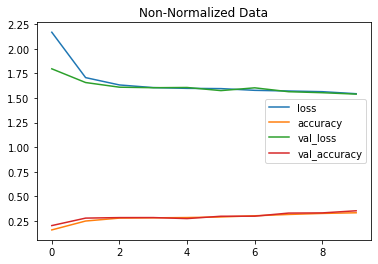

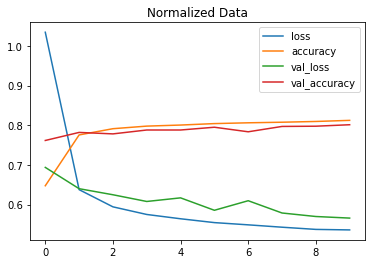

In [ ]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title= "Non-Normalized Data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title= "Normalized Data")

**Note:** The same model with **slightly** different data can produce **dramatic** difference in a result, it is very important to make sure you comparing them on the same criteria (e.g same architecture but different data or same data but diffrent architecture).

#Let's find the ideal Learnign rate...

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])

#Create the lerning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
find_lr_history= model_13.fit(train_data_norm, train_labels, 
             epochs=40, 
             validation_data= (test_data_norm, test_labels), 
             callbacks= [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal Learnig rate')

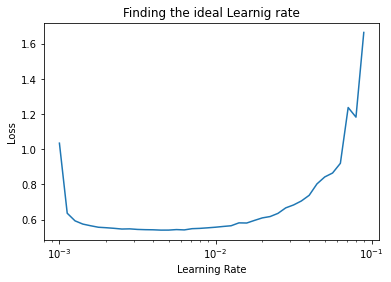

In [ ]:
#Plot the Learning Rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learnig rate")


In [ ]:
#Let's refit the mdoel with ideal learning rate

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(lr=0.001),#default learning rate of Adam is "0.001"
                 metrics= ["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs= 20,
                          validation_data=(test_data_norm, test_labels))



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:


Create the Confusion metrix
---



In [ ]:
import itertools
from sklearn.metrics import  confusion_matrix

def Conf_met(y_true, y_pred, classes=None, figsize = (10,10), text_size= 15):
  #Create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #To normalize our confusion matrix
  n_classes = cm.shape[0]

  #Let's draw it
  fig, ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
  fig.colorbar(cax)

  #Create the classes if we are working with binary or multiclass classification
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axis
  ax.set(title= "Confusion matrix",
        xlabel= "Predicted Label",
        ylabel= "Actual Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #set x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size and Title size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set the threshold for different colors
  threshold = (cm.max() + cm.max())/2.

  #Plot the text in each cell or box
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size= text_size)

In [ ]:
#make prediction 
y_probs= model_14.predict(test_data_norm) 
y_probs[0]

array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
       5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
       4.0605278e-03, 8.0787367e-01], dtype=float32)

In [ ]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32), 'Ankle boot')

In [ ]:
#Convert all the prediction probabilities into Integers
y_preds= y_probs.argmax(axis=1)

#View first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true= test_labels,
                 y_pred= y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

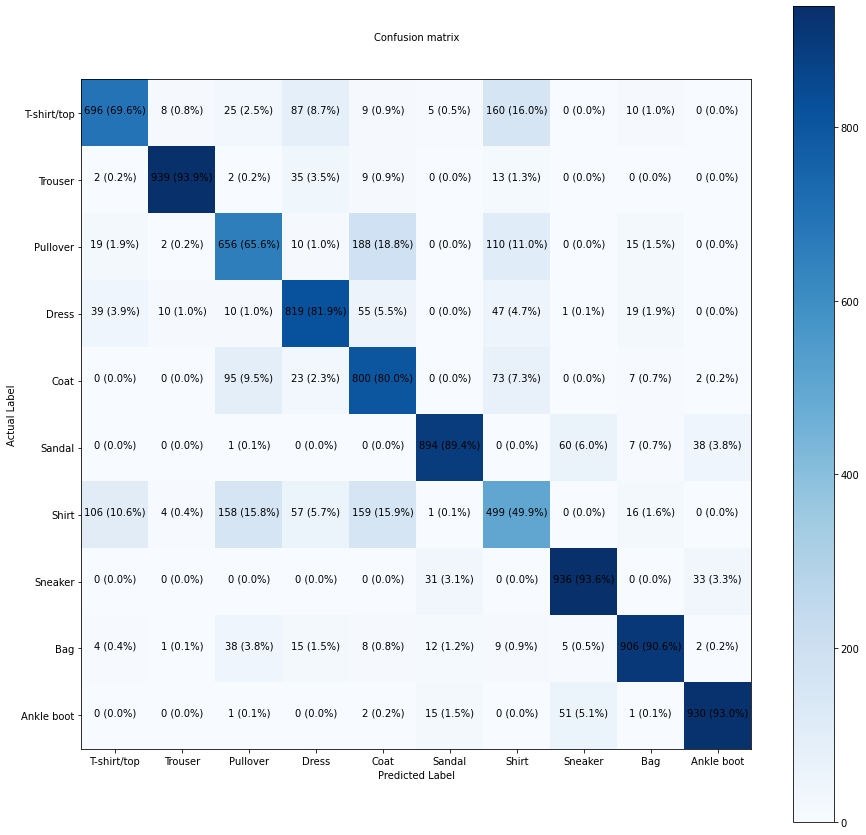

In [ ]:
Conf_met(y_true= test_labels,
         y_pred= y_preds,
         classes= class_names,
         figsize=(15,15),
         text_size=10)

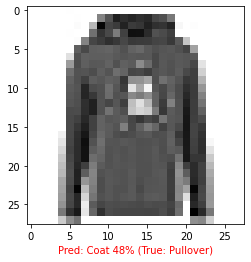

In [ ]:
#Plot the random image
import random

def plot_random_image(model, images, true_labels, classes):
  #Set up random integers
  i= random.randint(0, len(images))

  #Create predictions and targets
  target_img = images[i]
  pred_probs = model.predict(target_img.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_img, cmap=plt.cm.binary)

  #change the color of the title depending on prediction right or wrong
  if pred_label == true_label:
    color= "green"
  else:
    color= "red"
  
  #Add Xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color = color)

plot_random_image(model= model_14,
                  images= test_data_norm,
                  true_labels= test_labels,
                  classes= class_names)
